In [24]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    plt.plot(
        degrees,
        rmse_tr.T,
        'b',
        linestyle="-",
        color=([0.7, 0.7, 1]),
        label='train',
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_te.T,
        'r',
        linestyle="-",
        color=[1, 0.7, 0.7],
        label='test',
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_tr_mean.T,
        'b',
        linestyle="-",
        label='train',
        linewidth=3)
    plt.plot(
        degrees,
        rmse_te_mean.T,
        'r',
        linestyle="-",
        label='test',
        linewidth=3)
    plt.ylim(0.2, 0.7)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")

In [18]:
def train_model_full(network_model,
                     param,
                     X, y,
                     mini_batch_size,
                     kfolds,
                     nb_epochs,
                     lambdda=0.01,
                     lr=0.001,
                     verbose=False):
    acc_train_kfold = []
    loss_train_kfold = []
    acc_val_kfold = []
    loss_val_kfold = []

    for d, (train_index, val_index) in enumerate(kfolds.split(X)):
        if verbose:
            print('\nFold {}'.format(d))
            print('----------------------------------------------------------------')

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        X_train = Variable(torch.from_numpy(X_train))
        X_val = Variable(torch.from_numpy(X_val))
        y_train = Variable(torch.from_numpy(y_train))
        y_val = Variable(torch.from_numpy(y_val))

        model = network_model(**param)

        loss_train, loss_val, acc_train, acc_val, _ = train_model(model,
                                                               X_train, y_train,
                                                               X_val, y_val,
                                                               mini_batch_size,
                                                               nb_epochs,
                                                               lambdda, lr,
                                                               verbose)
        acc_train_kfold.append(acc_train)
        loss_train_kfold.append(loss_train)
        acc_val_kfold.append(acc_val)
        loss_val_kfold.append(loss_val)

    acc_train_kfold = np.array(acc_train_kfold)
    acc_val_kfold = np.array(acc_val_kfold)

    loss_train_kfold = np.array(loss_train_kfold)
    loss_val_kfold = np.array(loss_val_kfold)

    return loss_train_kfold, loss_val_kfold, acc_train_kfold, acc_val_kfold

In [19]:
import os
import sys
import torch
from sklearn import model_selection
from torch.autograd import Variable
import dlc_bci as bci
from networks import Conv_net
from train import train_model

In [20]:
MINI_BATCH_SIZE = 40
N_FOLDS = 10
N_EPOCHS = 10
kfolds = model_selection.KFold(n_splits=N_FOLDS, random_state=1234, shuffle=True)
import numpy as np
import numpy as np
import pprint
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable

In [68]:
MINI_BATCH_SIZE = 40
N_FOLDS = 10
N_EPOCHS = 1000

if __name__ == '__main__':
    train_input, train_target = bci.load(root='./data_bci')

    # put this inside the train to avoid data snooping
    mu, std = train_input.mean(0), train_input.std(0)
    train_input = train_input.sub_(mu).div_(std)

    X = train_input.numpy()
    y = train_target.numpy()

    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y,
                                                                      test_size=0.1,
                                                                      random_state=4321)

#     X_train = Variable(torch.from_numpy(X_train))
#     X_val = Variable(torch.from_numpy(X_val))
#     y_train = Variable(torch.from_numpy(y_train))
#     y_val = Variable(torch.from_numpy(y_val))

    params = {'kernel_size': [3],
              'layers': [47, 2],
              'layers_conv': [28, 6],
              'p': [0.6115211071391998, 0.5369292224385424],
              'pooling_kernel_size': [3],
              'size': 50}

    costs, costs_val, acc, acc_val = train_model_full(Conv_net,
                                                        params, 
                                                        X_train,
                                                        y_train,
                                                        MINI_BATCH_SIZE,
                                                        kfolds,
                                                        N_EPOCHS,
                                                        lambdda=0.01, 
                                                        lr=0.001)

In [69]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


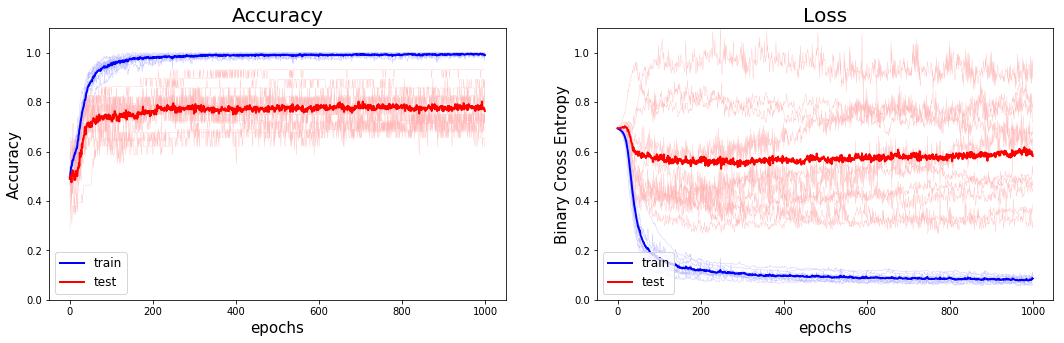

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].plot(
        acc.T,
        'b',
        linestyle="-",
        color=[0.7, 0.7, 1],
#         label='train',
        linewidth=0.3, label='_nolegend_');
ax[0].plot(
        acc_val.T,
        'r',
        linestyle="-",
        color=[1, 0.7, 0.7],
#         label='test',
        linewidth=0.3, label='_nolegend_');

ax[0].plot(
        np.expand_dims(np.mean(acc, axis=0), axis=0).T,
        'b',
        linestyle="-",
        label='train',
        linewidth=2)

ax[0].plot(
        np.expand_dims(np.mean(acc_val, axis=0), axis=0).T,
        'r',
        linestyle="-",
        label='test',
        linewidth=2)
    

ax[1].plot(
        costs.T,
        'b',
        linestyle="-",
        color=[0.7, 0.7, 1],
        linewidth=0.3, label='_nolegend_');
ax[1].plot(
        costs_val.T,
        'r',
        linestyle="-",
        color=[1, 0.7, 0.7],
        linewidth=0.3, label='_nolegend_');

ax[1].plot(
        np.expand_dims(np.mean(costs, axis=0), axis=0).T,
        'b',
        linestyle="-",
        label='train',
        linewidth=2)
ax[1].plot(
        np.expand_dims(np.mean(costs_val, axis=0), axis=0).T,
        'r',
        linestyle="-",
        label='test',
        linewidth=2)
    

ax[0].set_ylim(0, 1.1)
ax[0].set_xlabel("epochs", fontsize=15);
ax[0].set_ylabel("Accuracy", fontsize=15);
ax[0].set_title("Accuracy", fontsize=20);
ax[0].legend(fontsize=12, loc='lower left')

ax[1].set_ylim(0, 1.1);
ax[1].set_xlabel("epochs", fontsize=15);
ax[1].set_ylabel("Binary Cross Entropy", fontsize=15);
ax[1].set_title("Loss", fontsize=20);
ax[1].legend(fontsize=12, loc='lower left');